### Ensemble Algorithm

In [27]:
import numpy  as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



In [4]:
df = pd.read_csv("../Admission_predict.csv")
df.drop(columns="Serial No.", inplace=True)


In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [7]:
inp = df.drop(columns="Chance of Admit")
out = df["Chance of Admit"]

xtrain, xtest, ytrain, ytest = train_test_split(inp, out, test_size=0.3, stratify=out, random_state=29)


### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import StandardScaler

In [19]:
lr_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegressionCV(cv=KFold(n_splits=5), max_iter=1000)
)

est = [
    ("dt", DecisionTreeClassifier()),
    ("rf", RandomForestClassifier()),
    ("svc", SVC()),
    ("lr", lr_pipeline)
]

vc = VotingClassifier(estimators=est, voting="hard")
vc.fit(xtrain, ytrain)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()), ('svc', SVC()),
                             ('lr',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('logisticregressioncv',
                                               LogisticRegressionCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                                                                    max_iter=1000))]))])

In [24]:
vc_pred = vc.predict(xtest)
vc_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

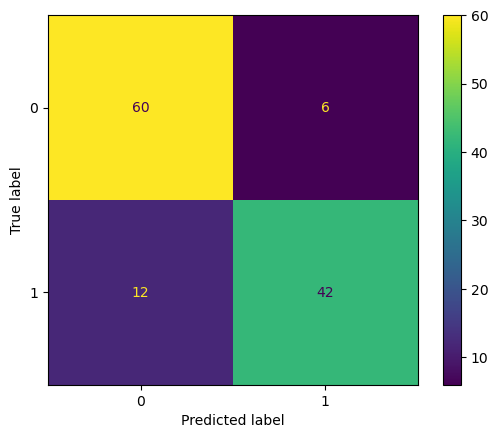

In [34]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(ytest, vc_pred)).plot()

In [35]:
print(classification_report(ytest, vc_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        66
           1       0.88      0.78      0.82        54

    accuracy                           0.85       120
   macro avg       0.85      0.84      0.85       120
weighted avg       0.85      0.85      0.85       120



### Bragging And Pasting

In [36]:
from sklearn.ensemble import BaggingClassifier

In [38]:
bag_clf = BaggingClassifier(estimator=RandomForestClassifier(),
                            n_estimators=100, 
                            max_samples=0.6,
                            bootstrap_features=True
                            )

bag_clf.fit(xtrain, ytrain)

BaggingClassifier(bootstrap_features=True, estimator=RandomForestClassifier(),
                  max_samples=0.6, n_estimators=100)

In [39]:
bag_pred = bag_clf.predict(xtest)

In [40]:
print(classification_report(ytest, bag_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89        66
           1       0.85      0.87      0.86        54

    accuracy                           0.88       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.88      0.88      0.88       120



In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
adb = AdaBoostClassifier(estimator=RandomForestClassifier(), 
                         n_estimators=100, 
                         learning_rate=0.1,
                         random_state=29)

adb.fit(xtrain, ytrain)

AdaBoostClassifier(estimator=RandomForestClassifier(), learning_rate=0.1,
                   n_estimators=100, random_state=29)

In [46]:
adb_pred = adb.predict(xtest)

In [48]:
print(classification_report(ytest, adb_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87        66
           1       0.85      0.83      0.84        54

    accuracy                           0.86       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.86      0.86      0.86       120



### Stacking

In [49]:
from sklearn.ensemble import StackingClassifier

In [53]:
stk_clf = StackingClassifier(
    estimators=[
        ("lr", lr_pipeline),
        ("rf", RandomForestClassifier()),
        ("svC", SVC())

    ],
    final_estimator=DecisionTreeClassifier()
)

stk_clf.fit(xtrain, ytrain)

StackingClassifier(estimators=[('lr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('logisticregressioncv',
                                                 LogisticRegressionCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                                                                      max_iter=1000))])),
                               ('rf', RandomForestClassifier()),
                               ('svC', SVC())],
                   final_estimator=DecisionTreeClassifier())

In [54]:
stk_pred = stk_clf.predict(xtest)

In [55]:
print(classification_report(ytest, stk_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        66
           1       0.83      0.83      0.83        54

    accuracy                           0.85       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.85      0.85      0.85       120

